In [1]:
# %%
import os
from IPython import embed
import bopt
import scipy
import matplotlib.pyplot as plt
import matplotlib
import torch
import torch.nn as nn
import asimov as asmv
import numpy as np
import datetime
import wandb
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib as mpl
import torch.nn.functional as F
import h5py as h5
import seaborn as sns


In [2]:
charm_bestcells="/home/zalaoui/charmander_bestcells/charmander_shifted_bestcells_v5/final_model.pt"
goldroger_bestcells="/home/zalaoui/goldrodger/goldrodger_shifted_bestcells_v4/final_model.pt"
charmander_clusters= [ 4, 15, 41, 42, 43, 50, 62, 107, 121, 168, 225, 226, 245, 251, 259, 261,
    263, 271, 282, 294, 302, 327, 334, 340, 342, 347, 363, 364, 367, 375, 400,
    555
]
goldroger_clusters=[8, 12, 24, 53, 57, 61, 74, 81, 87, 97, 102, 107, 123, 125, 130, 135, 157, 160, 168, 169, 172, 179, 188, 193, 195, 199, 228, 232, 233, 235, 236, 259, 266, 273, 289, 305, 325, 326, 340, 346, 354, 369, 370, 371, 398, 402, 411, 418, 432, 441, 442, 454, 472, 476, 484, 486, 509, 515, 517, 520, 525, 534, 537, 538, 545, 551, 558, 566, 598, 612, 638, 655, 661, 662, 674, 688, 696, 732, 733, 736, 737, 743, 744, 746, 751, 800, 807, 829, 837, 849, 851, 853, 854, 870, 873, 874]

# Notebook for Evaluating Model Performance During Repeated Stimulus Presentation

In [3]:
# %%
# Set global experiment parameters
charmander_h5_filepath = '/mnt/data/ctx/charm_50_rec.h5'
goldrodger_h5_filepath = '/mnt/data/ctx/goldroger_rec_50b_reconstructed.h5'
sample_rate = 50
device = bopt.cuda_init()  # Using specific GPU
# device='cuda:7'
samplerate = 50
num_before = 25
num_after = 5
seed = 2222
torch.random.manual_seed(seed)

direction='shifted'
test_series = ['series_008/epoch_001', 'series_009/epoch_001']
test_idxs = [-samplerate * 10, -1]
test_all = [0, -1]

test_dataset_shifted = bopt.CorticalDataset(charmander_h5_filepath,
                                    test_series,
                                    num_before=num_before,
                                    num_after=num_after,
                                    start_idx=test_all[0],
                                    end_idx=test_all[1],
                                    stimulus_key='shifted',
                                    grayscale=True,
                                    normalize_signals=False,
                                    signals=['locomotion', 'azimuth'],
                                    which_clusters=charmander_clusters,
                                    zero_blinks=True)

test_loader_shifted = torch.utils.data.DataLoader(test_dataset_shifted,
                                          batch_size=256,
                                          shuffle=False)



--- device:0 has 715
--- device:1 has 9
--- device:2 has 9
--- device:3 has 9
--- device:4 has 9
--- device:5 has 9
--- device:6 has 9
--- device:7 has 9
Selected device: cuda:1
Zeroing out blinks in stimulus (at init).
Zeroing out blinks in stimulus (at init).


/home/zalaoui/bopt/bopt/evaluation.py:1012: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=device)
Validating: 100%|██████████| 8/

Cell: 4, Correlation: -0.0002
Cell: 15, Correlation: -0.0197
Cell: 41, Correlation: -0.0498
Cell: 42, Correlation: 0.0212
Cell: 43, Correlation: -0.0370
Cell: 50, Correlation: -0.0877
Cell: 62, Correlation: -0.0372
Cell: 107, Correlation: nan
Cell: 121, Correlation: 0.0629
Cell: 168, Correlation: -0.0402
Cell: 225, Correlation: 0.3862
Cell: 226, Correlation: -0.0989
Cell: 245, Correlation: 0.4008
Cell: 251, Correlation: 0.2600
Cell: 259, Correlation: 0.1402
Cell: 261, Correlation: 0.2643
Cell: 263, Correlation: 0.3232
Cell: 271, Correlation: 0.3239
Cell: 282, Correlation: 0.0117
Cell: 294, Correlation: 0.1798
Cell: 302, Correlation: 0.1890
Cell: 327, Correlation: 0.3916
Cell: 334, Correlation: 0.2320
Cell: 340, Correlation: 0.5778
Cell: 342, Correlation: 0.4133
Cell: 347, Correlation: nan
Cell: 363, Correlation: 0.1485
Cell: 364, Correlation: 0.2770
Cell: 367, Correlation: 0.3294
Cell: 375, Correlation: 0.0359
Cell: 400, Correlation: 0.1197
Cell: 555, Correlation: -0.1338
Mean correlat

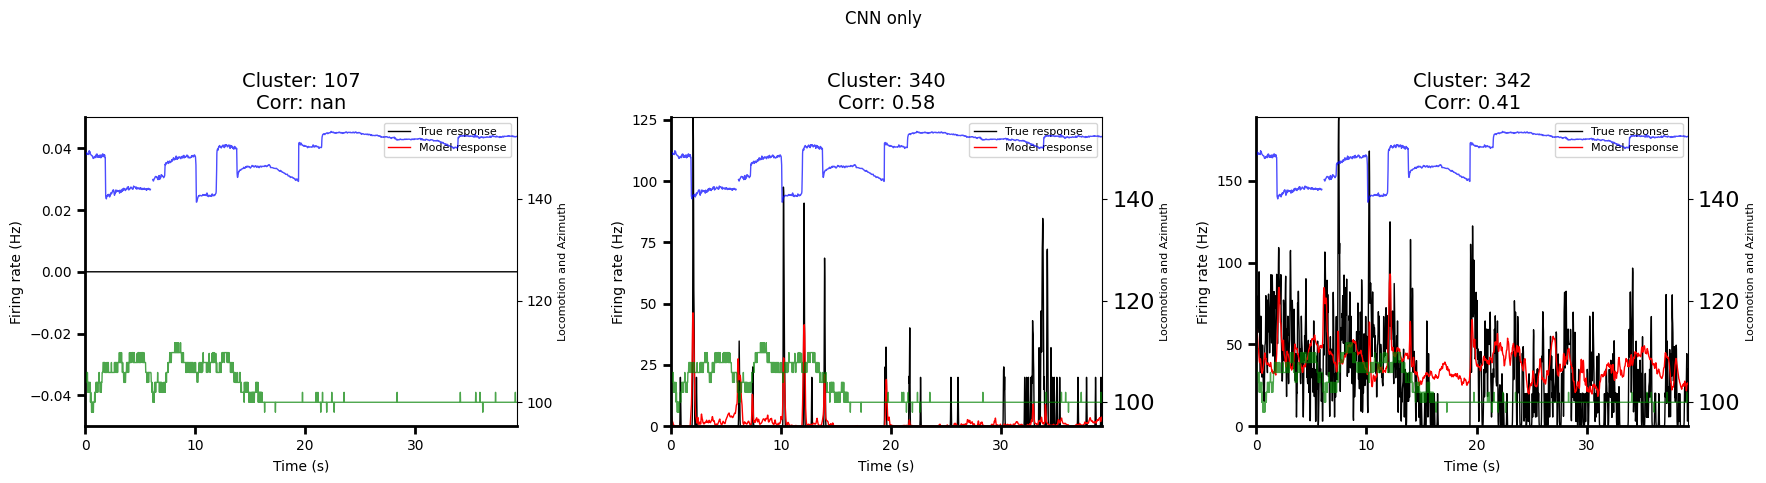

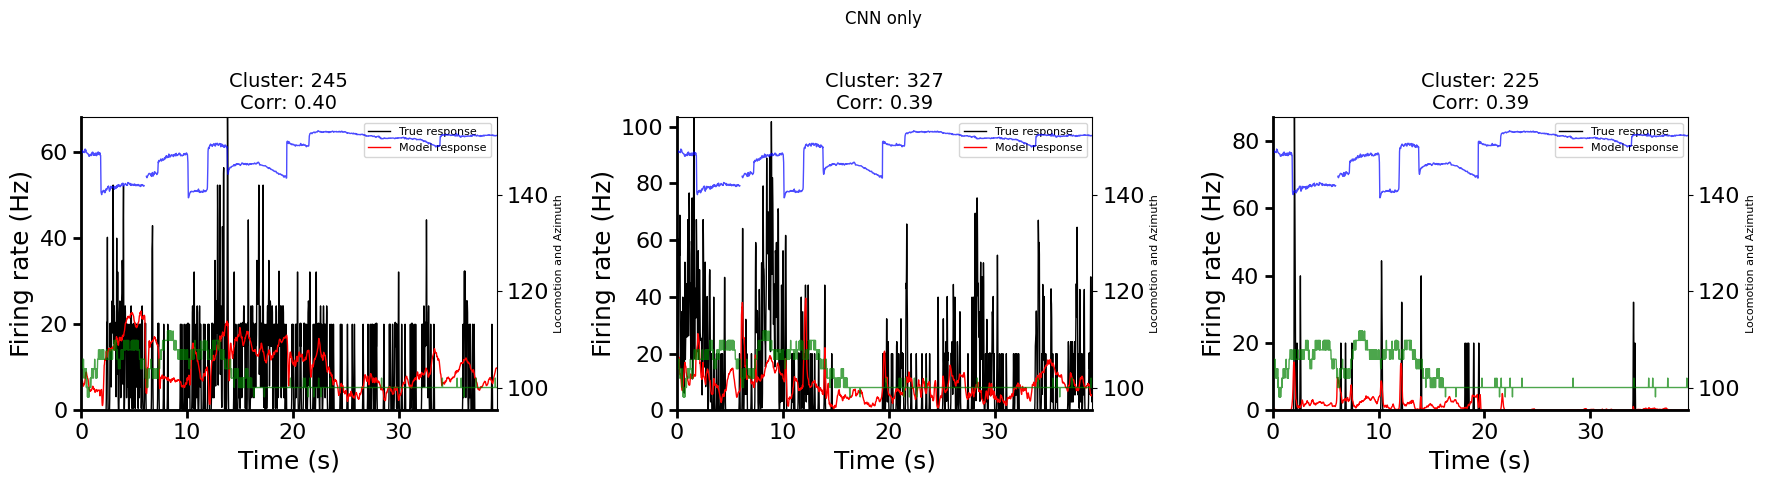

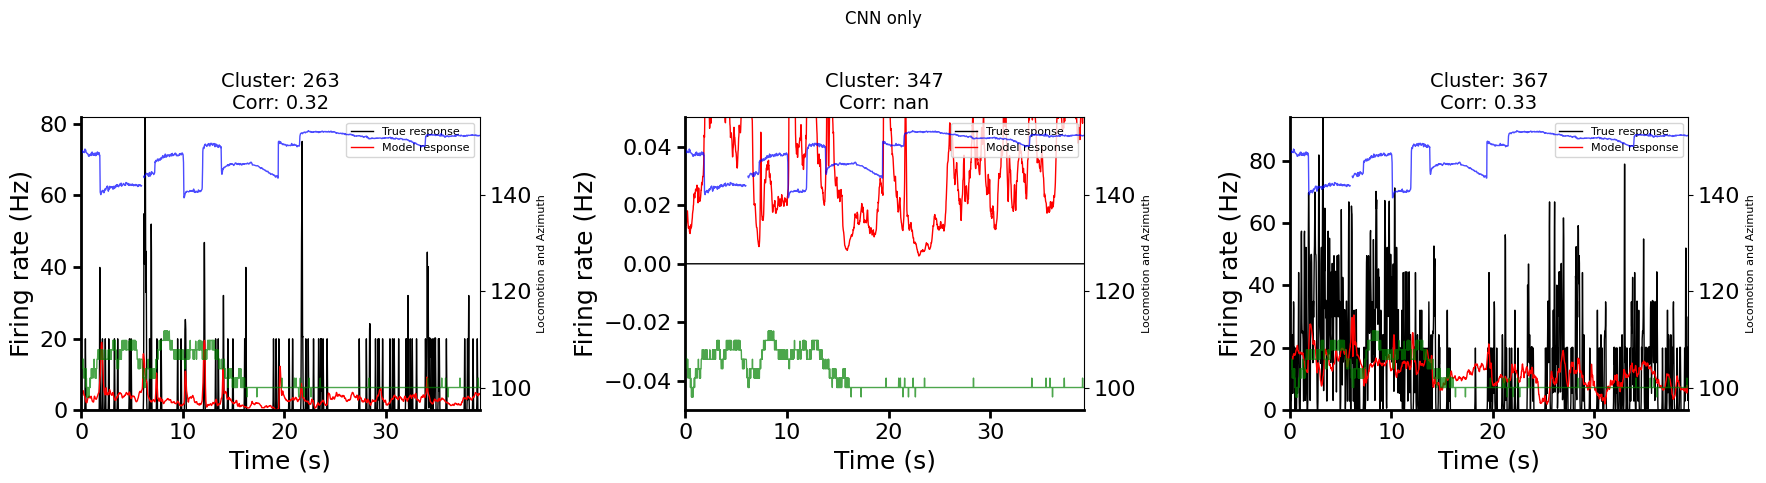

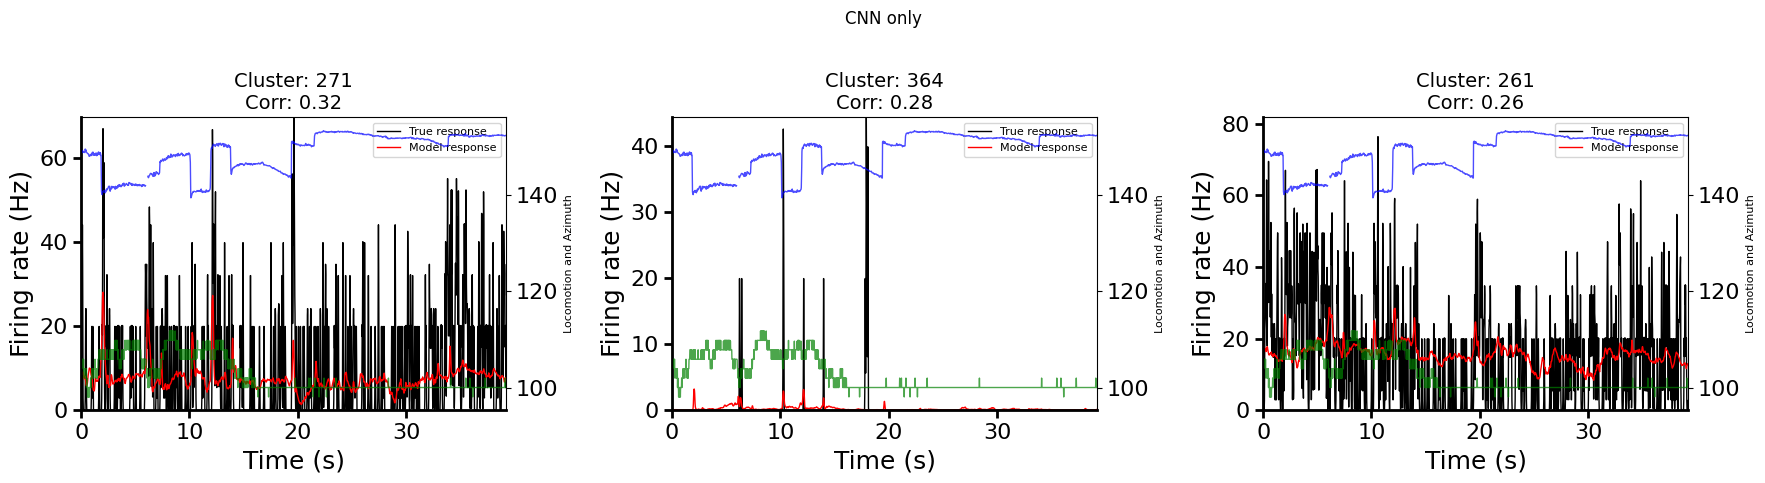

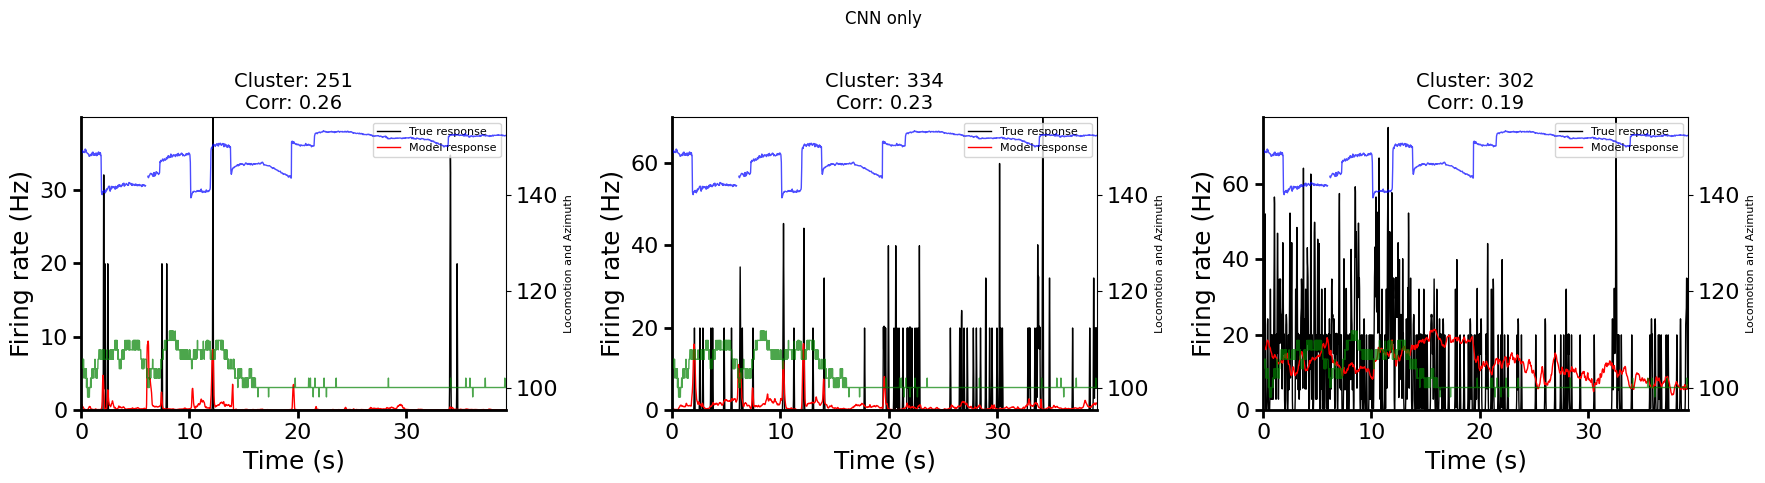

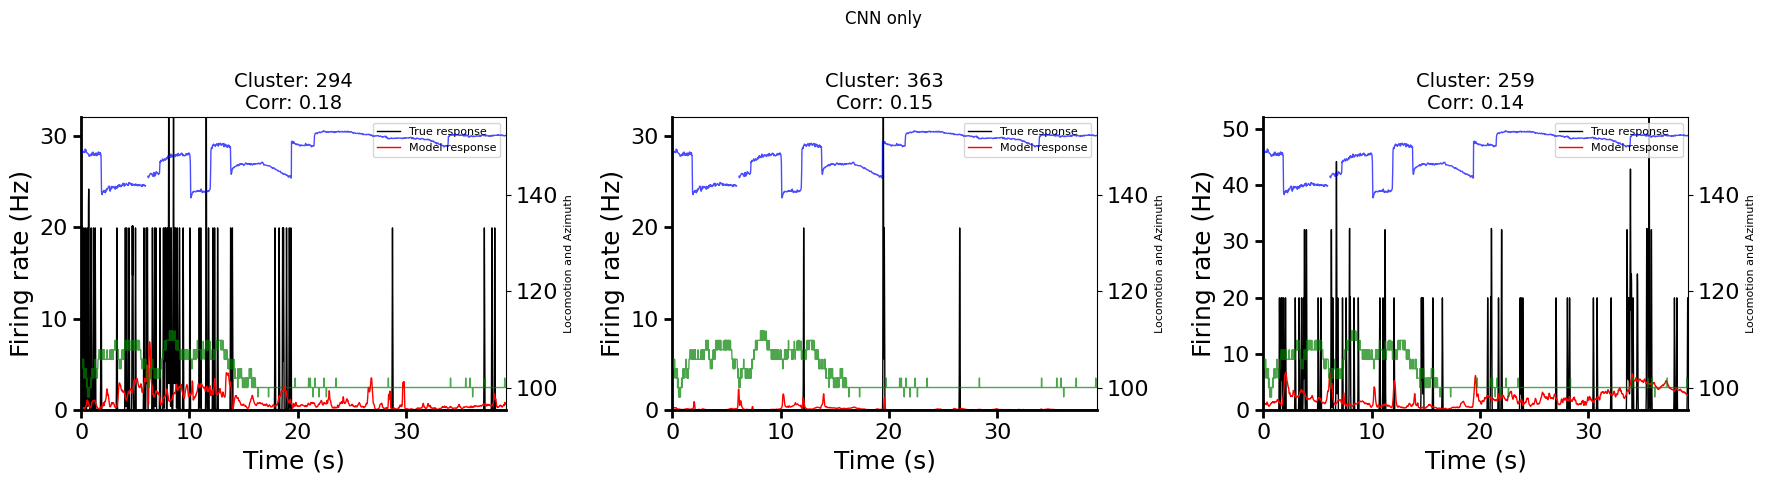

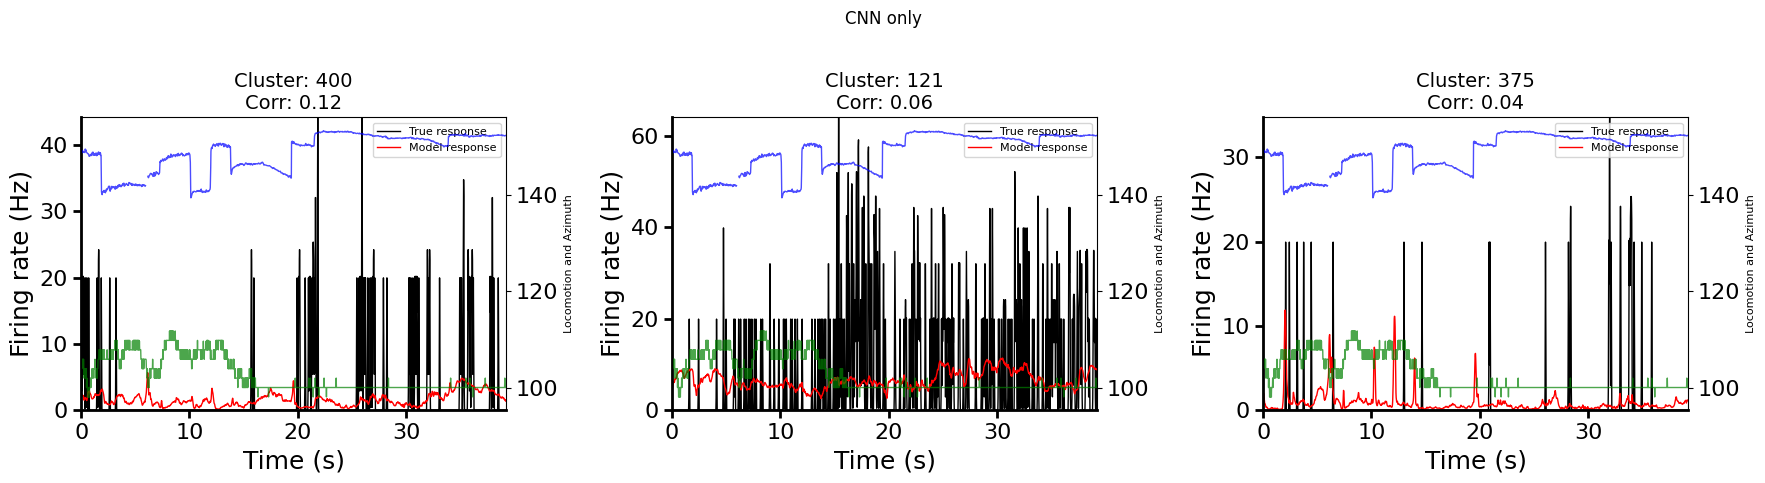

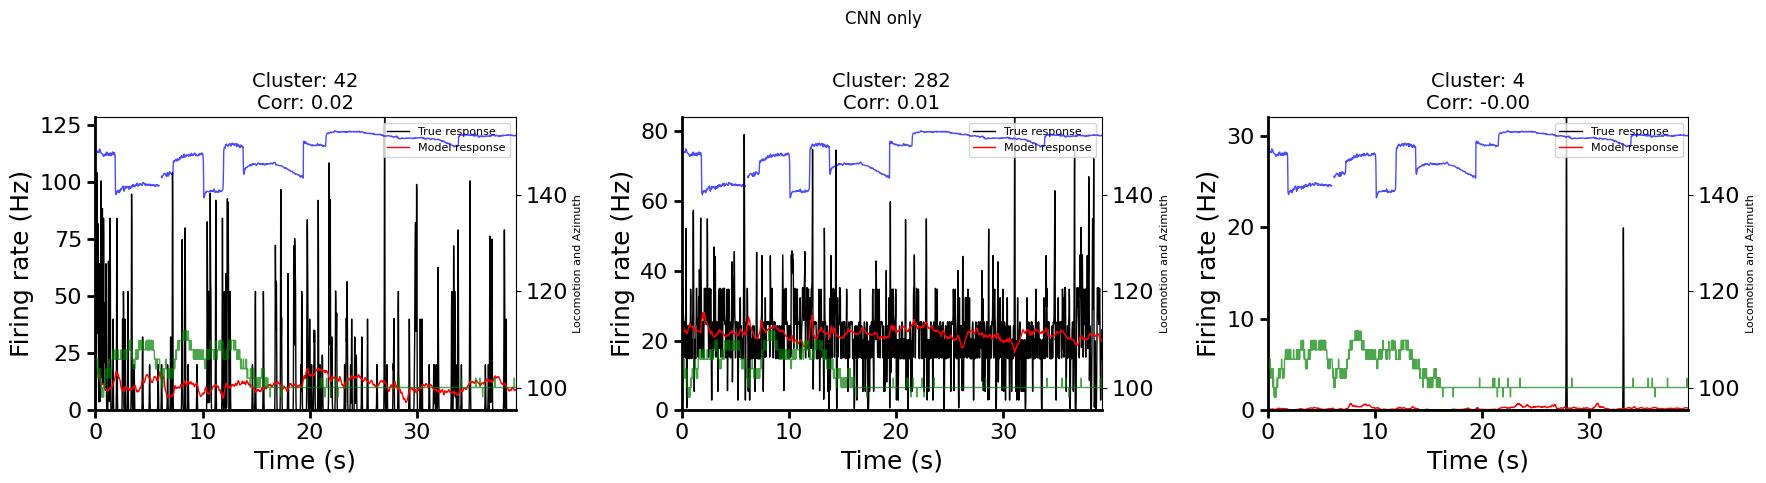

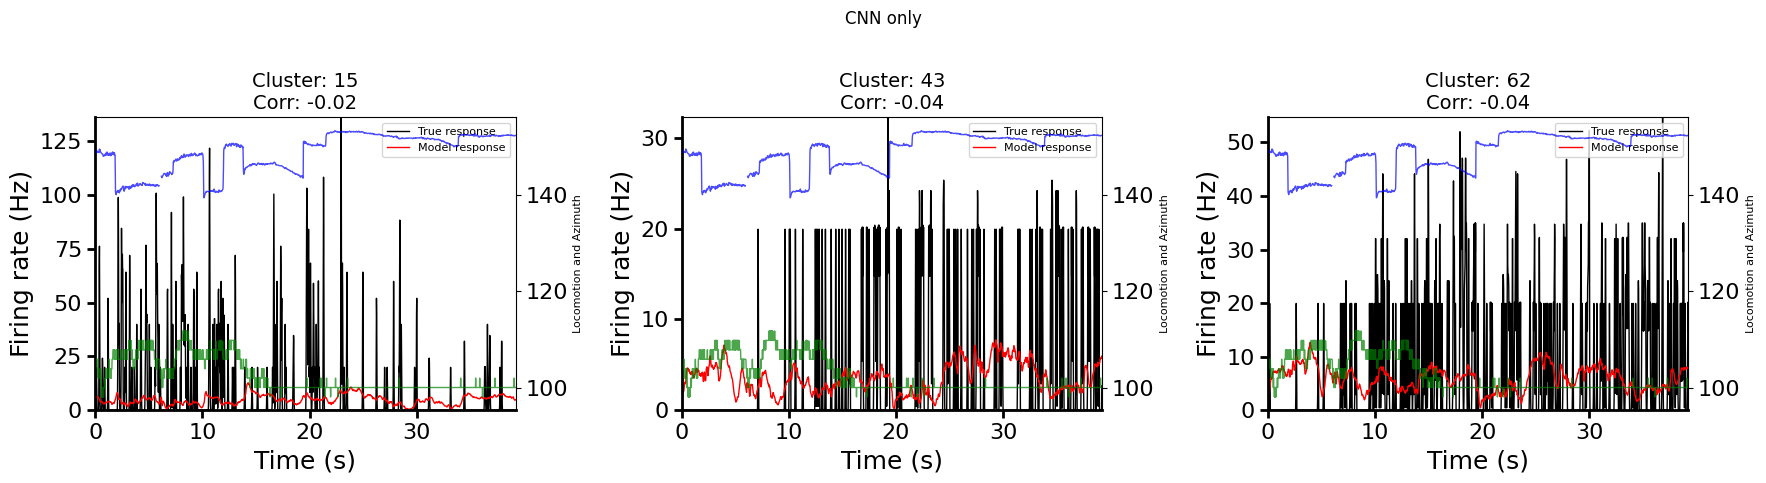

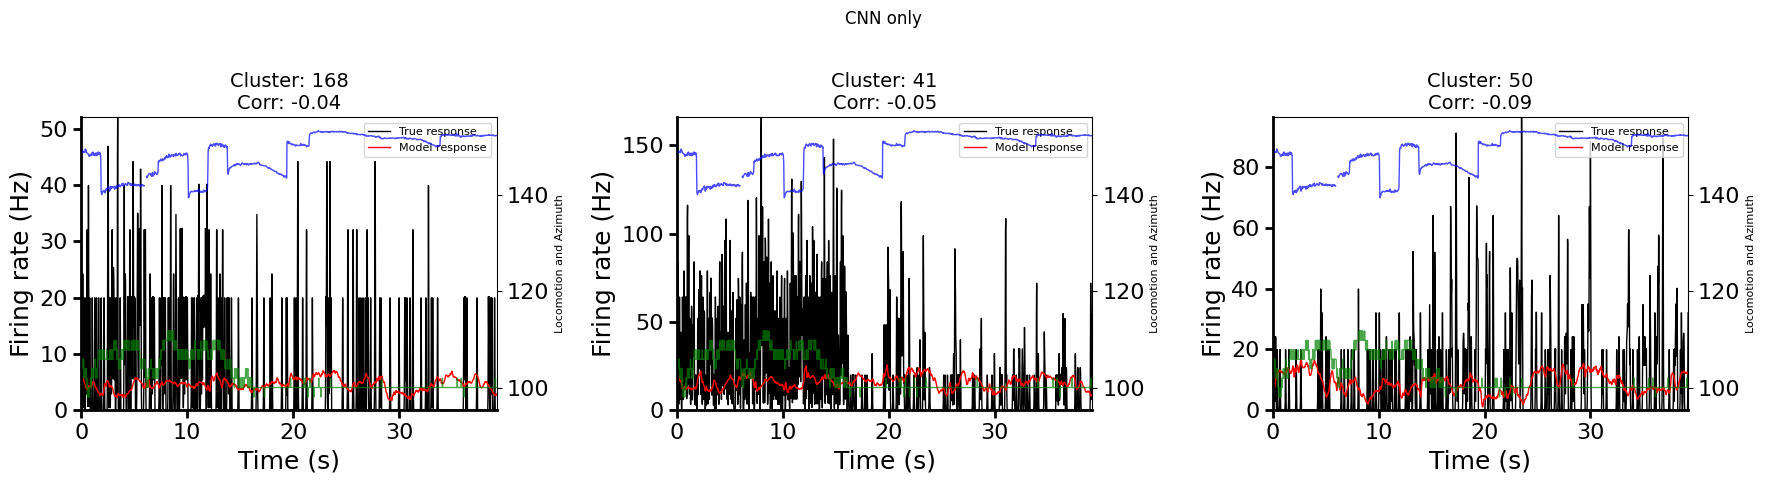

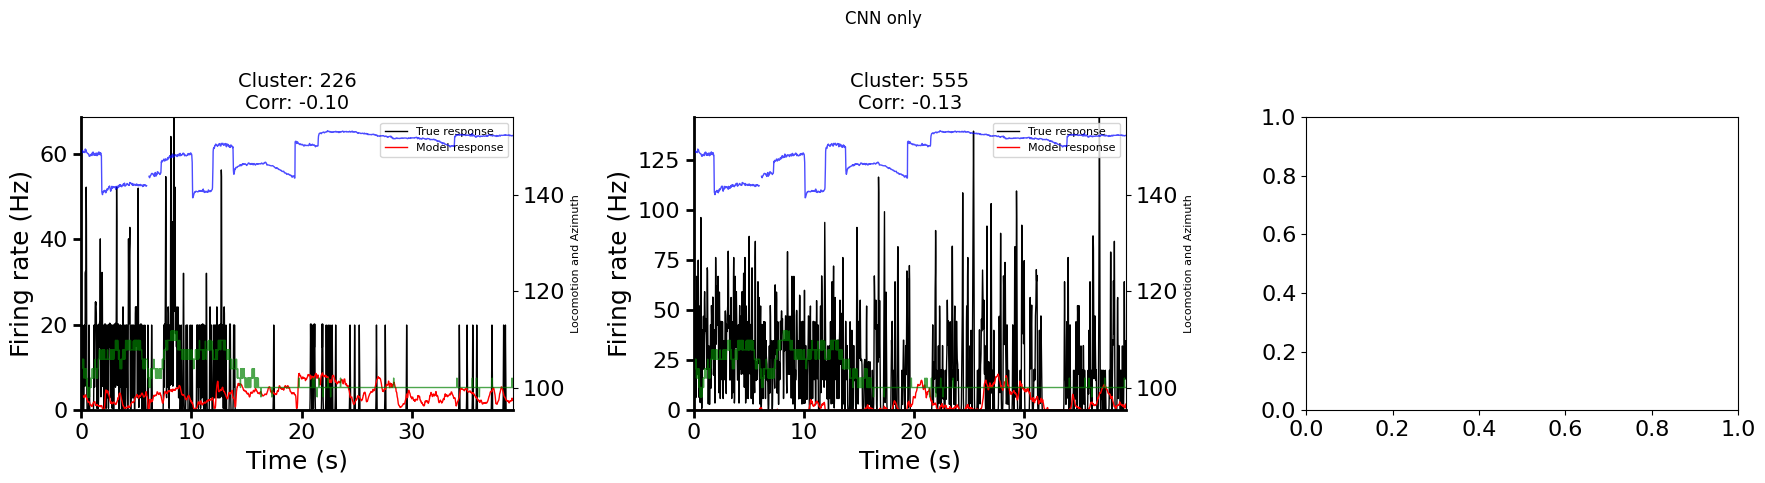

In [4]:
cnn_corrs= bopt.eval_model(model_path=charm_bestcells, dataloader=test_loader_shifted, signal= 'cnn', device=device, title='CNN only', plot=True) 